In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import extract as xfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [82]:
import shutil
fish = 'F15'  + '-BLNPTZ05-WILDTYPE-2photon-6dpf-gc6s-15%-sess-01-run-01'
currpath = F10t2 + '/PTZ-WILDTYPE/212121-WILDTYPE/' + fish


In [83]:
planelist = adfn.return_files(currpath, '', '*plane*')
for i,x in enumerate(planelist):
    os.mkdir('plane' + str(i))
    source_dir = currpath + '/PTZ-WILDTYPE-15' + '_plane' + str(i) + '/suite2p/plane0/'
    target_dir = currpath + '/plane' + str(i)
    file_names = os.listdir(source_dir)
    
    for file in file_names:
        shutil.move(os.path.join(source_dir, file), target_dir)

# Extract suite2p data

In [137]:
# Define fish folder
#------------------------------
experiment = 'PTZ-WILDTYPE'
save_folder = 'PTZ-WILDTYPE-CCM/comb_2'
disk = F10t2
date_list = adfn.return_files(disk, experiment, '**')
date_list

['212121-WILDTYPE']

In [ ]:
#Extract all active cells from suite2p plane data and save in Fsave
#--------------------------------------------------------------------
for x,date in enumerate(date_list): #loop through all files across different dates
    fish_list = adfn.return_files(disk + experiment + os.sep, date, '**')
    for i, fish in enumerate(fish_list): #loop through each fish in each folder
        if 'tif' not in fish:
            Fs2p = disk + experiment + os.sep + date + os.sep + fish + os.sep + 'suite2p'
            Fish  = xfn.fish_load(Fs2p, Fdata + save_folder, fish, experiment, date) 
    print('Processed folder' + str(x+1) + ' of ' + str(len(date_list)) )

# Filter non-cells

In [143]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE-CCM/comb_2'
coord_list = adfn.return_files(Fdata, experiment, '*allcoord.npy')
trace_list = adfn.return_files(Fdata, experiment, '*alltrace.npy')
coord_list, trace_list

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLNPTZ05_run-01_allcoord.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLNPTZ05_run-01_allcoord.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLNPTZ05_run-01_allcoord.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLNPTZ05_run-01_allcoord.npy',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLNPTZ05_run-01_allcoord.npy'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLNPTZ05_run-01_alltrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLNPTZ05_run-01_alltrace.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLNPTZ05_run-01_alltrace.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLNPTZ05_run-01_alltrace.npy',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLNPTZ05_run-01_alltrace.npy'])

In [ ]:
# Loop through and threshold
#------------------------------

thresh = 1.02 #1.01 for GF plasticity
highcut = 500 #high freq cutoff
lowcut = 0 #low freq cutoff
window = 9 #window size for max-min calculation, 9 or 41
save = 'yes' #yes to save

for x in range(len(coord_list)): 
    
    Fish = {} #Define dict
    
    Ftrace, Fcoord = trace_list[x], coord_list[x]
    
    # Create dict - Fish
    #---------------------------------------------------------------------------
    Fish = {'Trace':np.load(Ftrace), 'Coord': np.load(Fcoord)}
    
    #Use if cutting off first 5 mins of recording
    #Fish = {'Trace':np.load(Ftrace)[:,819:], 'Coord': np.load(Fcoord)}

    # Apply bandpass filter normalise and choose n cells to plot, plot raw + filt
    #-----------------------------------------------------------------------------
    Ffilt, Fnorm = xfn.fish_filter(Fish['Trace'], highcut, lowcut)
    Fish.update({'Filt':Ffilt, 'Norm':Fnorm})
    
    # Define size of sliding window in frames to calculate max of mins
    #---------------------------------------------------------------------------
    Fmxmn = xfn.fish_max_min(Fish['Norm'], window) 
    Fish.update({'Maxmin':Fmxmn})
    
    #Apply threshold
    ffin = xfn.fish_thresh(Fdata + experiment, Fcoord, Fish['Trace'], Fish['Coord'], Fish['Maxmin'], thresh, save)
        
    print('Processed ' + str(x+1) + ' of ' + str(len(coord_list)) )

# Back up data

In [113]:
# Define fish folder
#------------------------------
experiment = 'PTZ-WILDTYPE'
disk = F10t2 #location of files to backup
backup = '/Volumes/Dominic 10tb/' #destination to back up
add = 'no' #add the day to the filing name
date_list = adfn.return_files(disk, experiment, '**')
date_list

['212121-WILDTYPE']

In [22]:
#Extract all active cells from suite2p plane data and save in Fsave
#--------------------------------------------------------------------
for x,date in enumerate(date_list): #loop through all files across different dates
    fish_list = adfn.return_files(disk + experiment + os.sep, date, '**')
    for fish in fish_list: #loop through each fish in each folder
        if 'tif' not in fish:
            Fs2p = disk + experiment + os.sep + date + os.sep + fish + os.sep + 'suite2p'

            #Backup regtiffs, ops and stat files - makesubdir yes only for each new fish
            #dir_mode = new, add_condition, add_day
            #---------------------------------------------------------------------------
            if 'BLN' not in fish: 
                mode = 'add_condition'
            else:
                mode = 'new'
            Backup  = xfn.fish_backup(Fs2p, backup, experiment, fish, date, add_day = add, dir_mode = mode)
            
    print('Processed folder ' + str(x+1) + ' of ' + str(len(date_list)) )

Processed folder 1 of 1


In [ ]:
#Extract all active cells from suite2p plane data and save in Fsave
#--------------------------------------------------------------------
for x,date in enumerate(date_list): #loop through all files across different dates
    fish_list = adfn.return_files(disk + experiment + os.sep, date, '**')
    for fish in fish_list: #loop through each fish in each folder
        if 'tif' not in fish:
            Fs2p = disk + experiment + os.sep + date + os.sep + fish + os.sep + 'suite2p'

            #Backup regtiffs, ops and stat files - makesubdir yes only for each new fish
            #dir_mode = new, add_condition, add_day
            #---------------------------------------------------------------------------
            
            
            Backup  = xfn.fish_backup(Fs2p, backup, experiment, fish, date, add_day = add, dir_mode = 'new')

    print('Processed folder ' + str(x+1) + ' of ' + str(len(date_list)) )

# Normalise traces

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*PTZ05*cut*.npy')
rt_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_cutdeltaff.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2p

In [ ]:

for e in range(len(rt_list)):
    name = rt_list[e]
    mat = np.load(rt_list[e])
    dff_mat =  xfn.deltaff(mat, 0.05)
    np.save(Fdata + experiment + os.sep + name[:name.find('run')+6] + '_' +'cutdeltaff.npy', dff_mat)  
    print('Done ' + name)

Done PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy
Done PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy


# Binarise traces
* replace BCL with Oasis?


In [147]:
wdt = 0.57 #spiking probability = 0.59
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'save'

for i in range(len(rt_list)):
    name = rt_list[i][:rt_list[i].find('run')+6]
    data = np.load(rt_list[i])
    c, sks, B = xfn.bcl_function_parameters(wdt, Fdata, experiment, name, data ,lamb, varB, varC, Cmean, frequency, gausfilt, mode )
    print('Done ' + name)

Done PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLNPTZ05_run-01
Done PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLNPTZ05_run-01
Done PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLNPTZ05_run-01
Done PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLNPTZ05_run-01
Done PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLNPTZ05_run-01


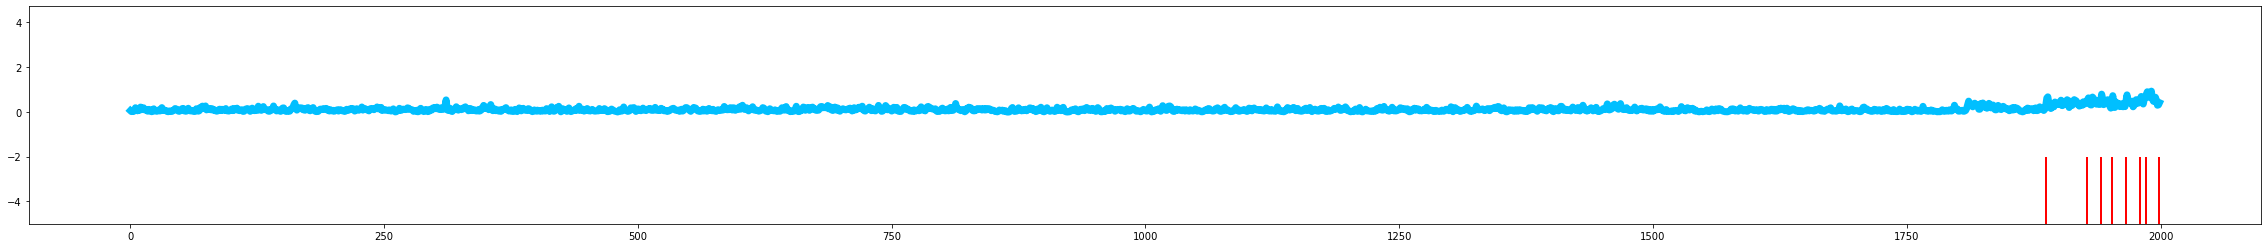

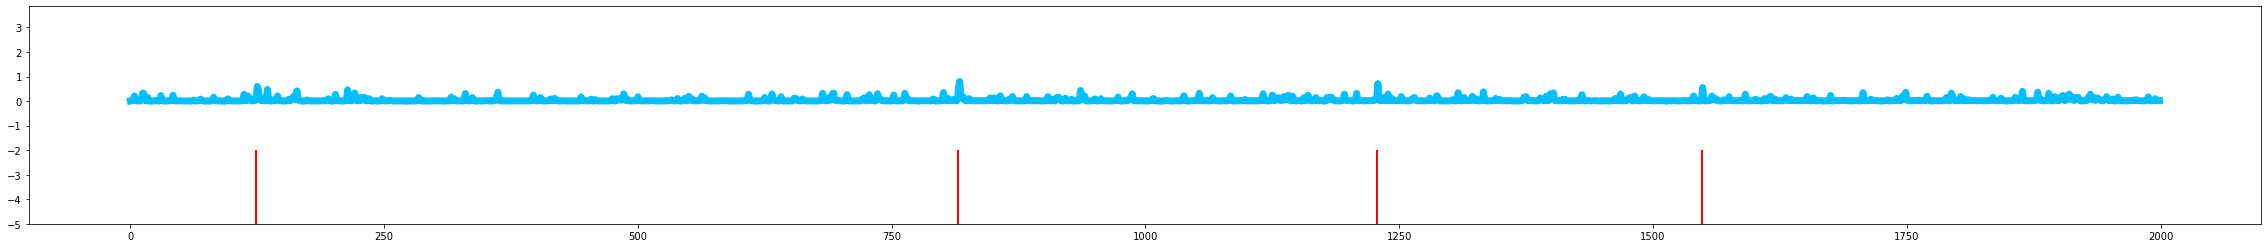

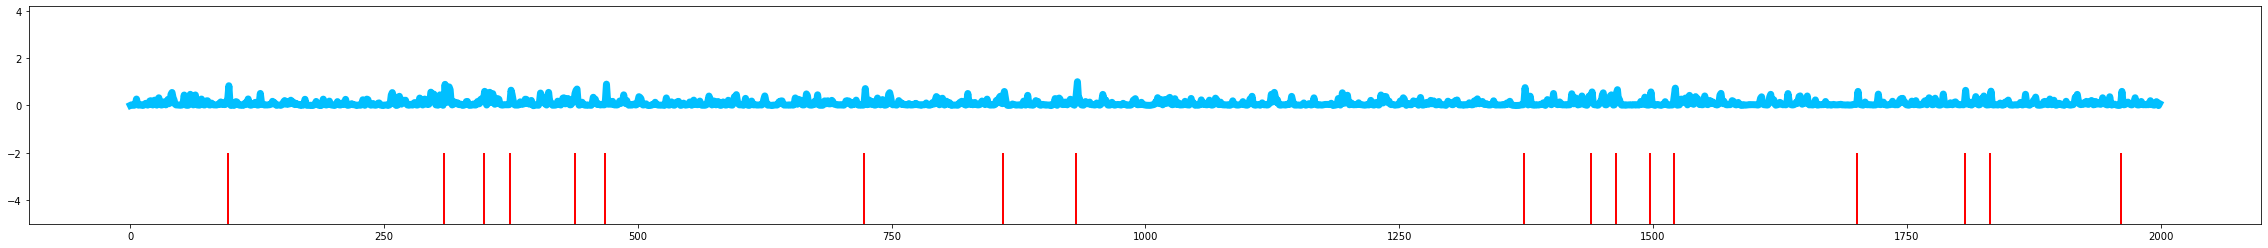

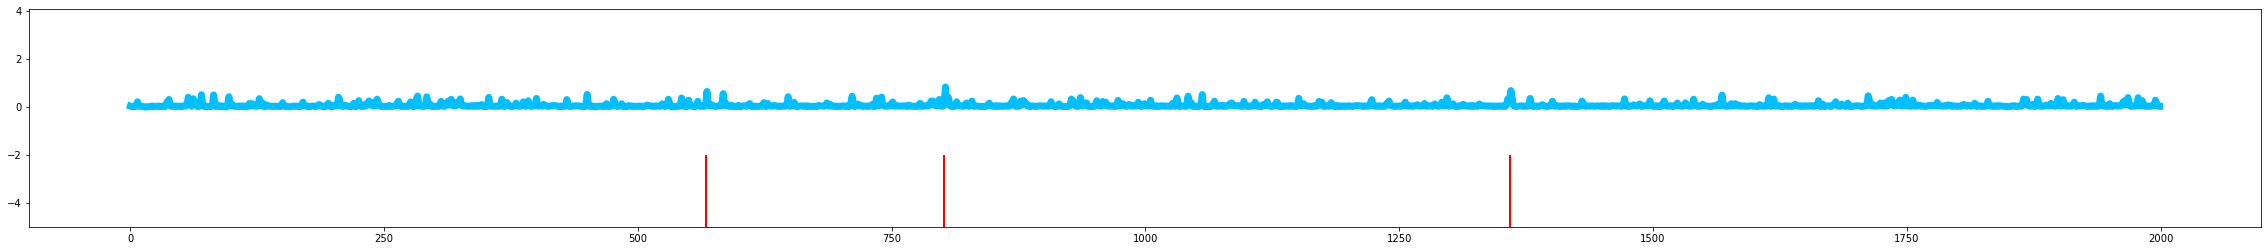

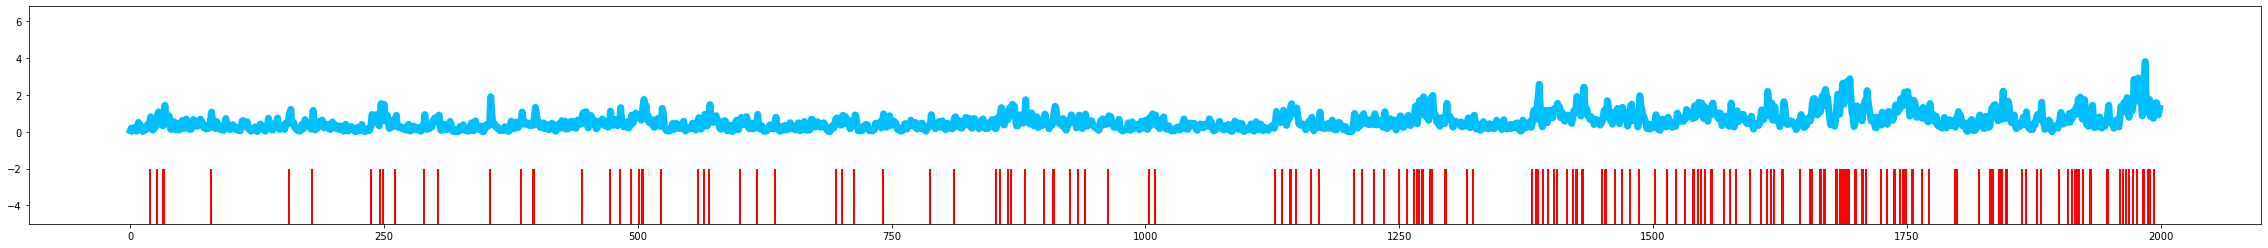

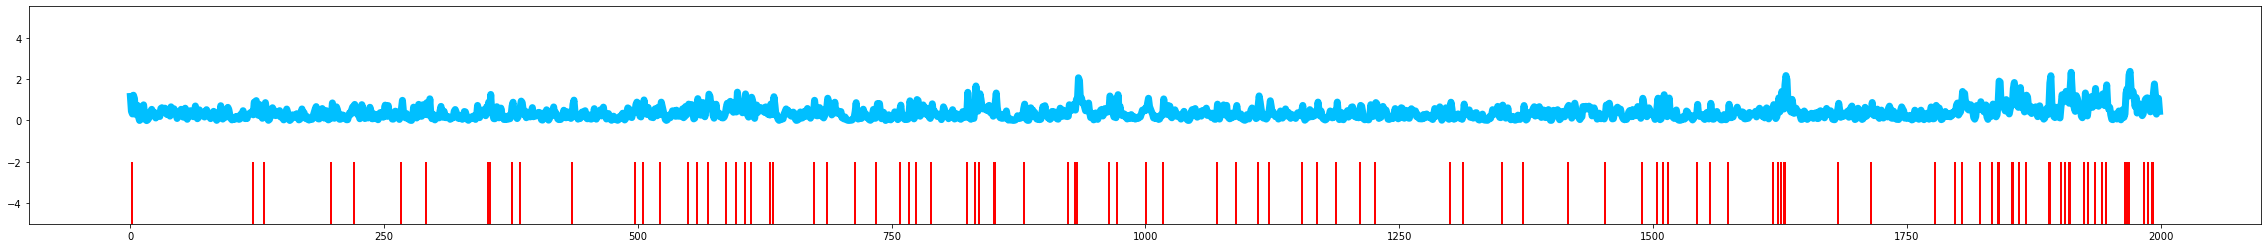

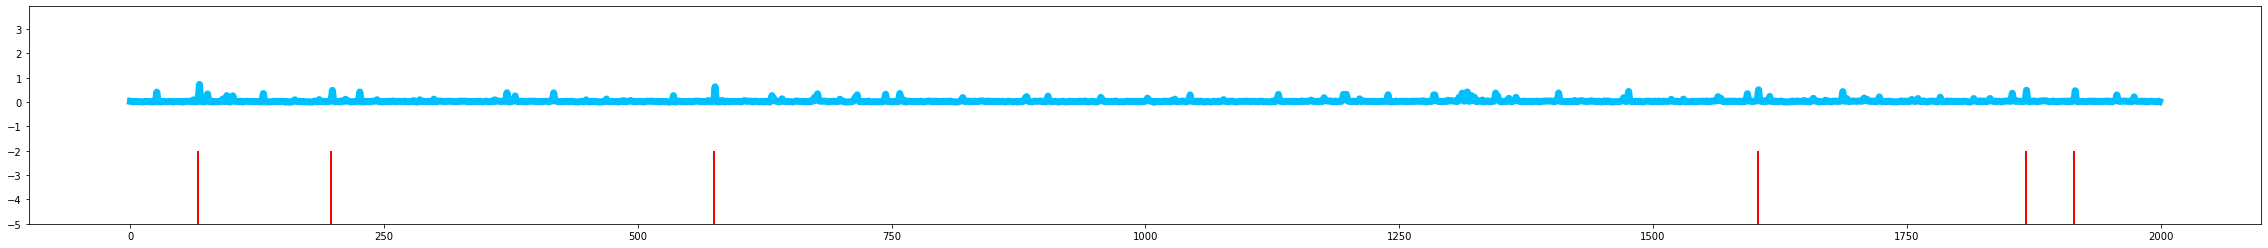

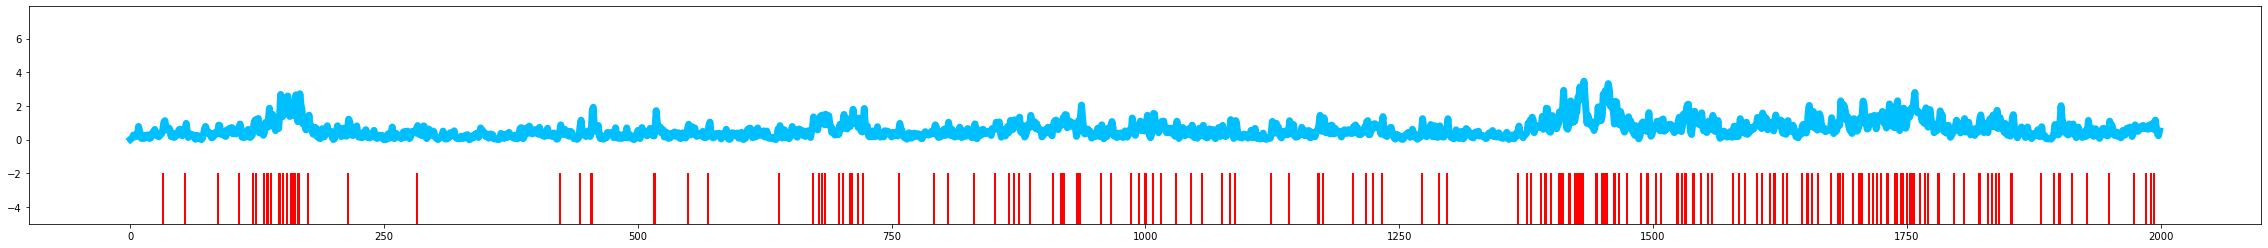

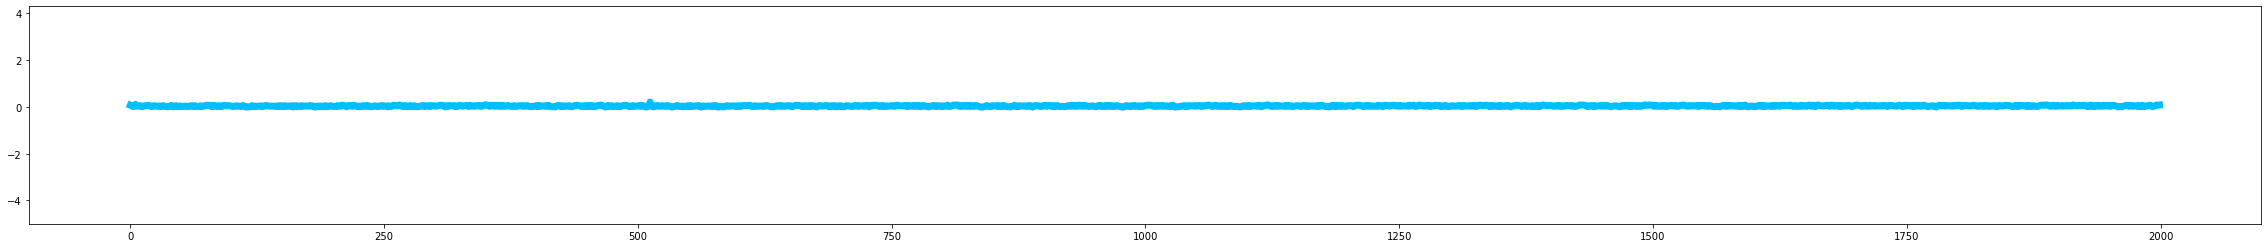

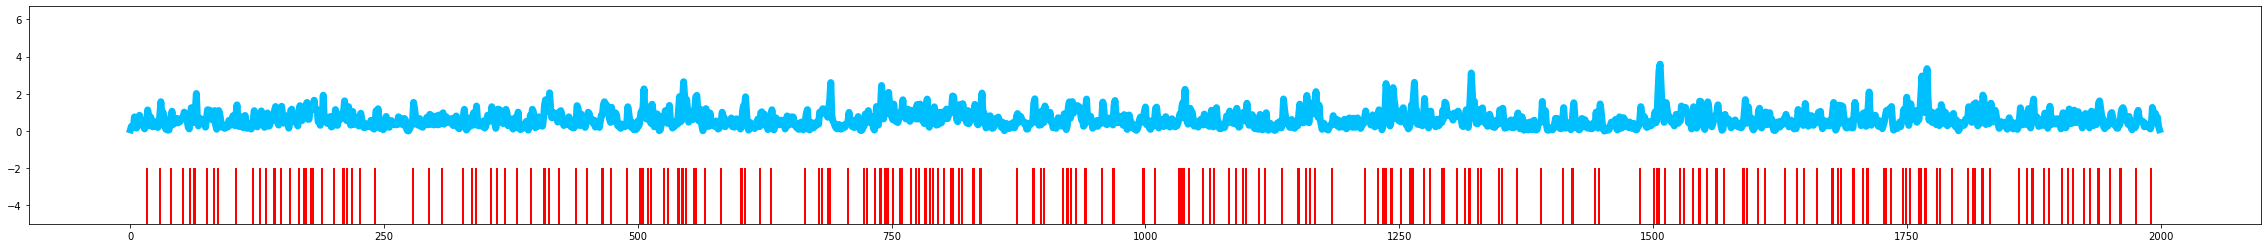

In [23]:
%autoreload

wdt = 0.59 #spiking probability = 0.59
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'see'

i = 10
name = rt_list[i][:rt_list[i].find('run')+6]
data = np.load(rt_list[i])
xfn.bcl_function_parameters(wdt, Fdata, experiment, name, data ,lamb, varB, varC, Cmean, frequency, gausfilt, mode )

In [5]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*BLN*cutreal*.npy')
rt_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace_.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_

In [12]:



def bcl_model(wdt, trace, lamb, varB, varC, Cmean, frequency, gausfilt):
    from scipy import fftpack
    import math
    from math import log, pi
    from scipy.ndimage import gaussian_filter1d
    import random as rand 

    #Preprocess Function
    t1 = ((trace + 500)/ (500 + np.mean(trace[np.where(trace < np.quantile(trace, 0.08, axis = 0))[0]]))) - 1 
    #normalise trace 
    y = gaussian_filter1d(t1, gausfilt, axis = 0)
    difft = diff(t1) 
    varX = get_variance_of_the_decreases(difft)

    #Declare Variables
    N = len(y)
    B = np.zeros(y.shape[0])
    c =  np.zeros(y.shape[0])
    sks = np.zeros(y.shape[0])
    B[0] = np.mean(y[0:500])  #make baseline starting point
    dff = np.zeros(y.shape[0])
    loglik = 0
    dt = float(1) / frequency

    #each time point, chance calcium event vs baseline shift
    #bcl outputs a timeseries for baseline and calcium

    for t in range(1,N):

        #new calcium value, if no calcium spike at current t
        #LET CALCIUM DECAY - IF CALCIUM AT T-1, THEN DECAY - IF NO CALCIUM AT T -1, CNEW REMAINS 0 
        #calcium at previous time point * exponential - if calcium = 0, then cnew = 0
        cnew = c[t - 1] * np.exp(-lamb* dt)  

        #new baseline value, if no calcium spike at current t - i.e. IF BASELINE IS DECREASING 
        #SIGNAL AT T - MODELLED CALCIUM (with variance) + BASELINE BEFORE (with variance)
        #(Baseline at t-1 * variance of decreases) + (Signal at t, - cnew * baseline variance + frequency) 
        #/ variances of overall data 
        Bnew = (varX * B[t - 1] + varB * dt * (y[t] - cnew)) / (varX + varB * dt)

        #p of timestep being explained by baseline, not spike
        logp0 = log(1 - wdt) - 0.5 * log(2 * pi) - 0.5 * log(varX + varB * dt) - (y[t] - cnew - B[t - 1]) ** 2 / (2 * varX + 2 * varB * dt)

        #new calcium value, if calcium spike
        # (signal at t, - baseline at t-1, - decayed calcium) + (mean calcium + calcium decay)
        # / (1 + variance of data)
        cspike = Cmean + cnew + (y[t] - cnew - B[t - 1]) / (1 + varB * dt / varC + varX / varC)
        cspike = np.clip(cspike, 0, 10000)

        #new baseline value, if calcium spike
        #Baseline at t-1, + variance of baseline*freq/variance of calcium * (calcium spike - decay - mean cal)
        Bspike = B[t - 1] + varB * dt / varC * (cspike - cnew - Cmean)

        #p of timestep being explained by spike
        logp1 = log(wdt) - 0.5 * log(2 * pi) - 0.5 * log(varX + varB * dt + varC) - (y[t] - cnew - B[t - 1] - Cmean)**2 / (2 * varX + 2 * varB * dt + 2 * varC)


        #compares logp1 vs logp0 
        if logp1 < logp0:
            c[t] = cnew
            B[t] = Bnew
            loglik = loglik + logp0

        else:
            c[t] = cspike
            B[t] = Bspike
            loglik = loglik + logp1

    dfftsks = diff(c)
    sks[np.where(np.asarray(dfftsks) > 0)] = 1
    return(c, sks, B, y)


def diff(timeseries):
#minus each timestep by the timestep before it 
#so you can estimate variance from one step to next
    diff_timeseries = []
    for index in range(1,len(timeseries)):
        difference = timeseries[index] - timeseries[index - 1]
        diff_timeseries.append(difference)
    return diff_timeseries


def lowpass_filter(trace,frequency_cutoff): 
#fft gives symmetrical trace - half represented by real half by imaginary
#ft represented with imaginary components, in 3d as 3d spiral - 2d section is sine wave
#high frequencies represented in middle, low either side (reflected as real and imaginary)
#so discard half of imaginary series by blocking out middle half

    from scipy import fftpack
    fast_fourier_transform = fftpack.fft(trace) # Take The Fourier Transform Of The Trace (power y axis, freq x axis)
    fast_fourier_transform[frequency_cutoff : len(fast_fourier_transform)-(frequency_cutoff-1)] = 0 
    #high frequencies represented in middle, low either side (reflected as real and imaginary) - so discard half of imaginary series by blocking out middle half
    filtered_signal = fftpack.ifft(fast_fourier_transform)  # Run The Inverse Fourier Transform To Get Back To A Signal
    real_filtered_signal = np.real(filtered_signal) #throw away imaginary
    return real_filtered_signal


def get_variance_of_the_decreases(difft): 
#variances of decreases, timepoint is whenever there is a drop 
#variance of decrease says how much it decays ie. calcim signal
    import math
    from math import log, pi

    number_of_decreases = 0 
    squared_sum_of_decreases = 0
    for timepoint in difft:
        #if next point is a decrease ie. decay, model the variance of decay
        if timepoint < 0:
            number_of_decreases += 1
            squared_sum_of_decreases += (timepoint ** 2)
    variance = squared_sum_of_decreases / number_of_decreases
    variance = math.sqrt(variance)
    return variance


In [115]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*BLN*01_cutreal*.npy')
rt_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy']

In [14]:
data = np.load(rt_list[0])
wdt = 0.57 #spiking probability = 0.59
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6

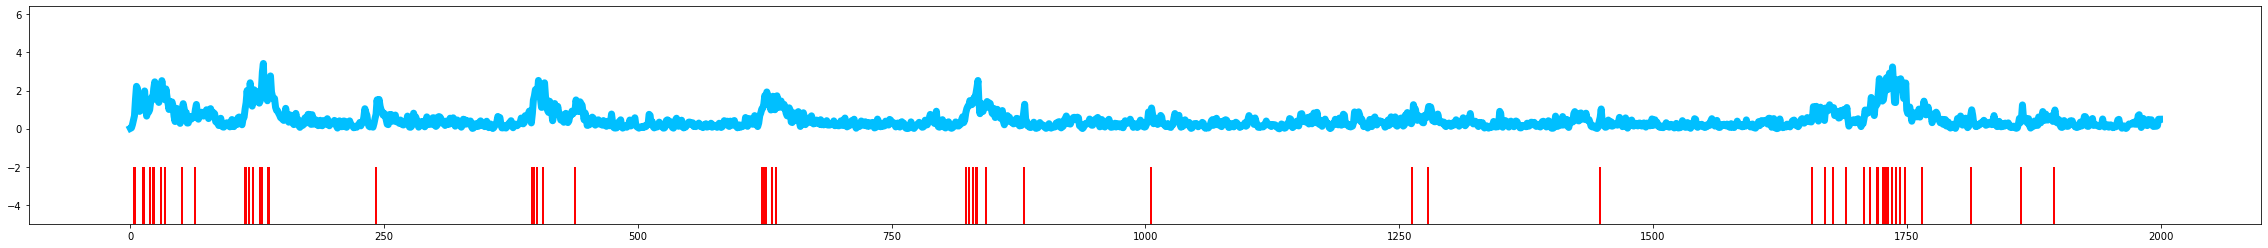

In [121]:
import random as rand 

data = np.load(rt_list[4])


from scipy.ndimage import gaussian_filter1d

rdm = rand.sample(range(0, data.shape [0]), 10)
#rdm = []
i=5
trace = data[i]
C, sks, B, y = bcl_model(wdt, trace, lamb, varB, varC, Cmean, frequency, gausfilt) 

ind = 2000
plt.figure(figsize = (40,4))    
plt.plot(y[:ind], c = 'deepskyblue', linewidth = 7)
for x in np.where(sks[:ind] == 1)[0]: plt.vlines(x=x,  alpha = 1, ymin = -8, ymax = -2, color = 'red', linewidth = 2)
plt.ylim(-5,np.max(y)+3)
plt.savefig(Ffig + 'bin_BLN.svg', transparent=True)
plt.show()

In [122]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*PTZ05*cutreal*.npy')
rt_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy']

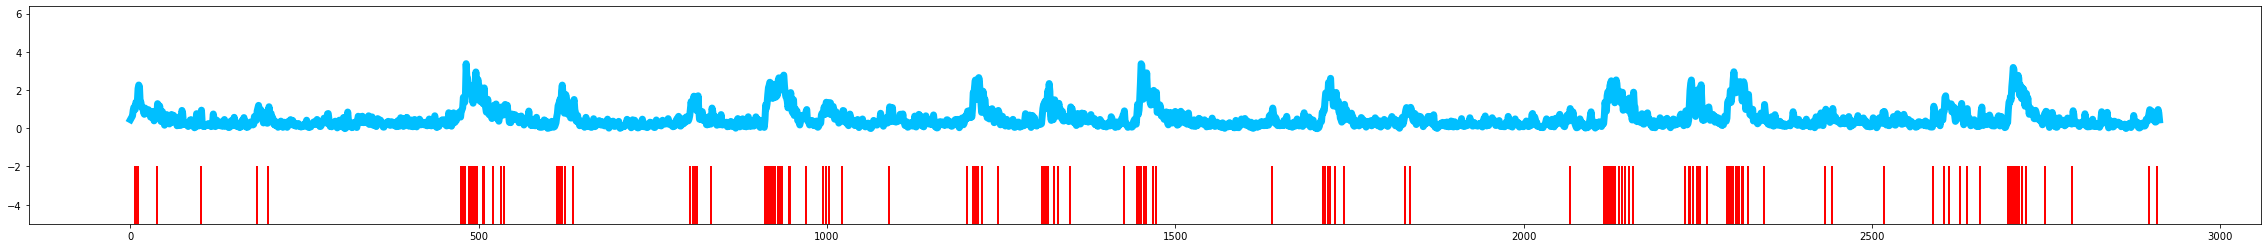

In [125]:
import random as rand 

data = np.load(rt_list[4])


from scipy.ndimage import gaussian_filter1d

rdm = rand.sample(range(0, data.shape [0]), 10)
#rdm = [0]
i=1
trace = data[i]
C, sks, B, y = bcl_model(wdt, trace, lamb, varB, varC, Cmean, frequency, gausfilt) 

ind = 2000
plt.figure(figsize = (40,4))    
plt.plot(y[ind:], c = 'deepskyblue', linewidth = 7)
for x in np.where(sks[ind:] == 1)[0]: plt.vlines(x=x,  alpha = 1, ymin = -8, ymax = -2, color = 'red', linewidth = 2)
plt.ylim(-5,np.max(y)+3)
plt.savefig(Ffig + 'bin_PTZ05.svg', transparent=True)

plt.show()

In [126]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*PTZ20*1_cutreal*.npy')
rt_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy']

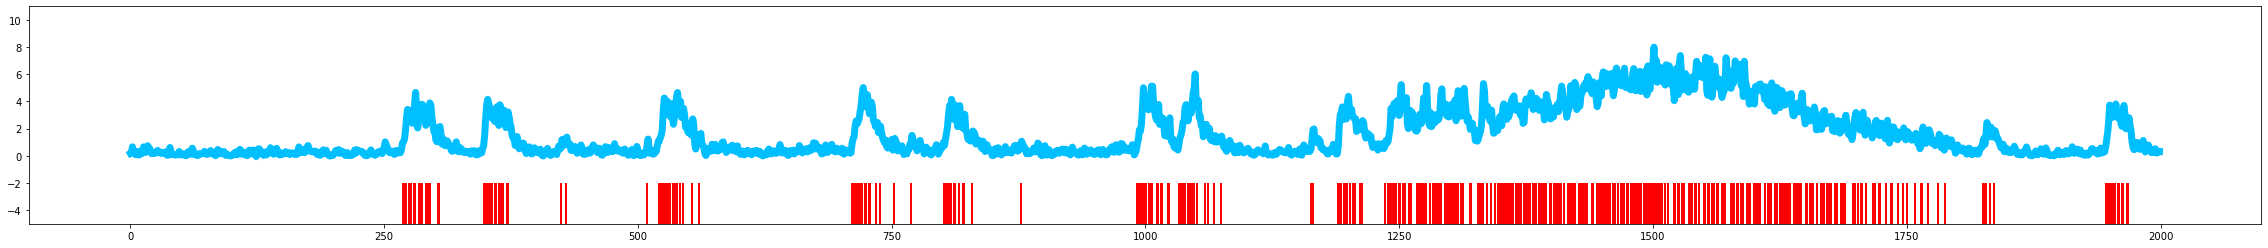

In [128]:
import random as rand 

data = np.load(rt_list[4])


from scipy.ndimage import gaussian_filter1d

rdm = rand.sample(range(0, data.shape [0]), 10)
#rdm = [0]
i=1
trace = data[i]
C, sks, B, y = bcl_model(wdt, trace, lamb, varB, varC, Cmean, frequency, gausfilt) 

ind = 2000
plt.figure(figsize = (40,4))    
plt.plot(y[:ind], c = 'deepskyblue', linewidth = 7)
for x in np.where(sks[:ind] == 1)[0]: plt.vlines(x=x,  alpha = 1, ymin = -8, ymax = -2, color = 'red', linewidth = 2)
plt.ylim(-5,np.max(y)+3)
plt.savefig(Ffig + 'bin_PTZ20.svg', transparent=True)

plt.show()

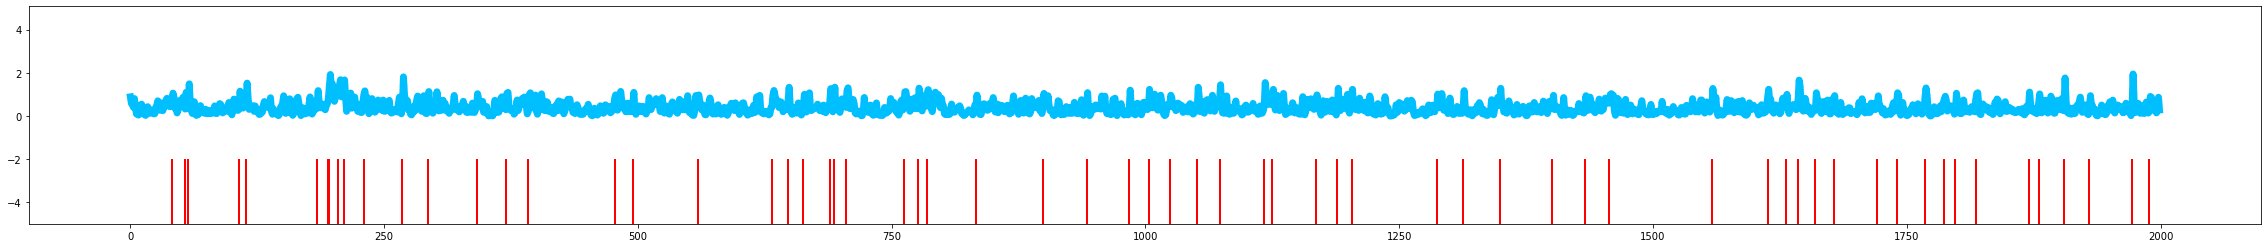

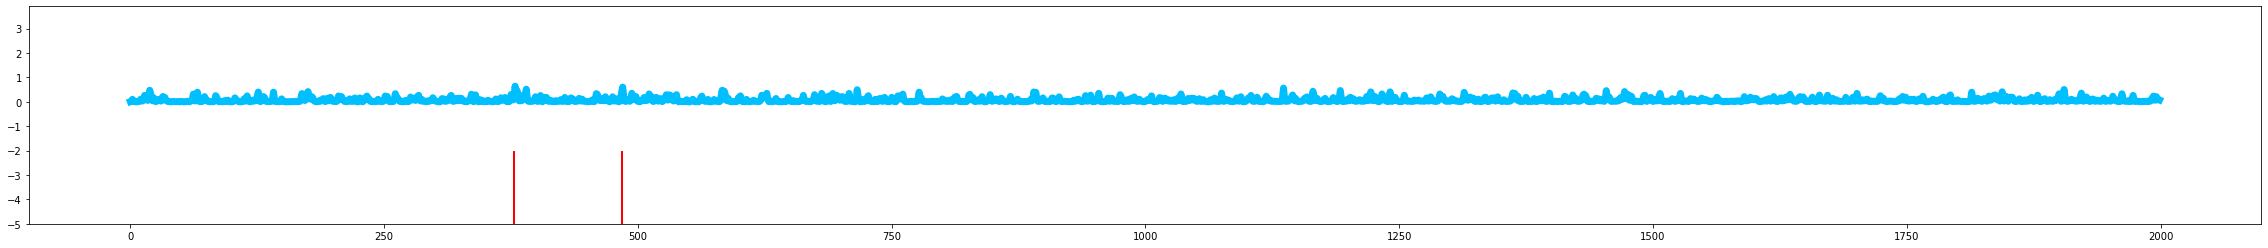

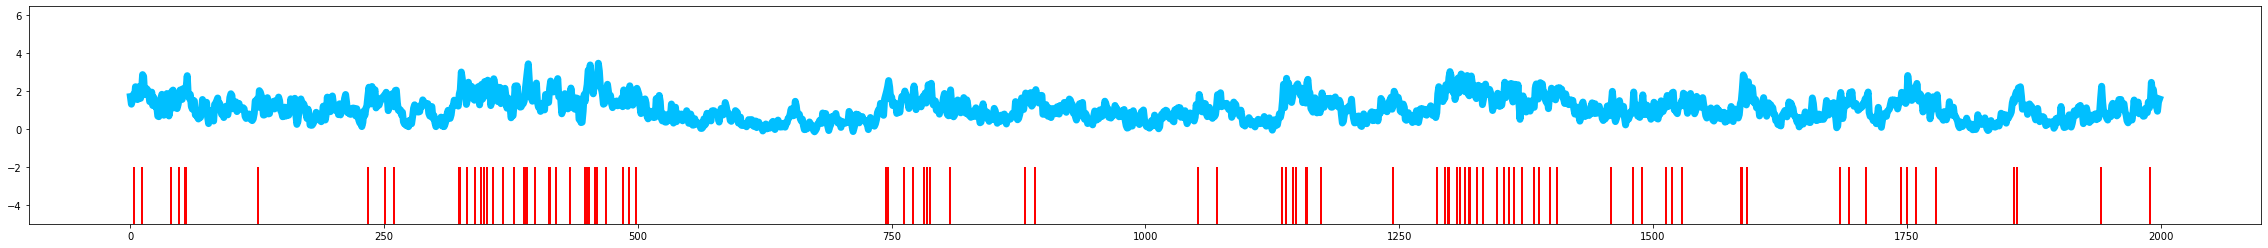

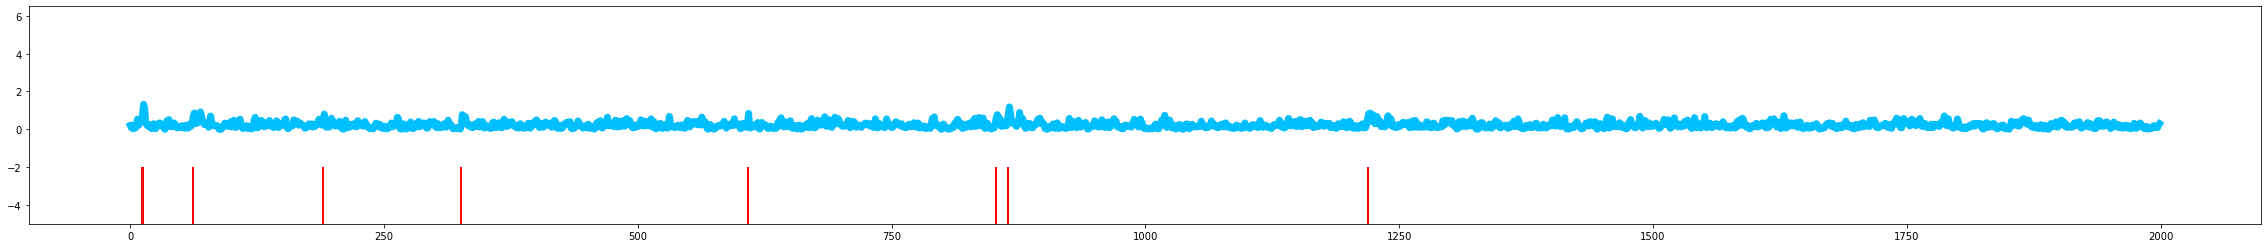

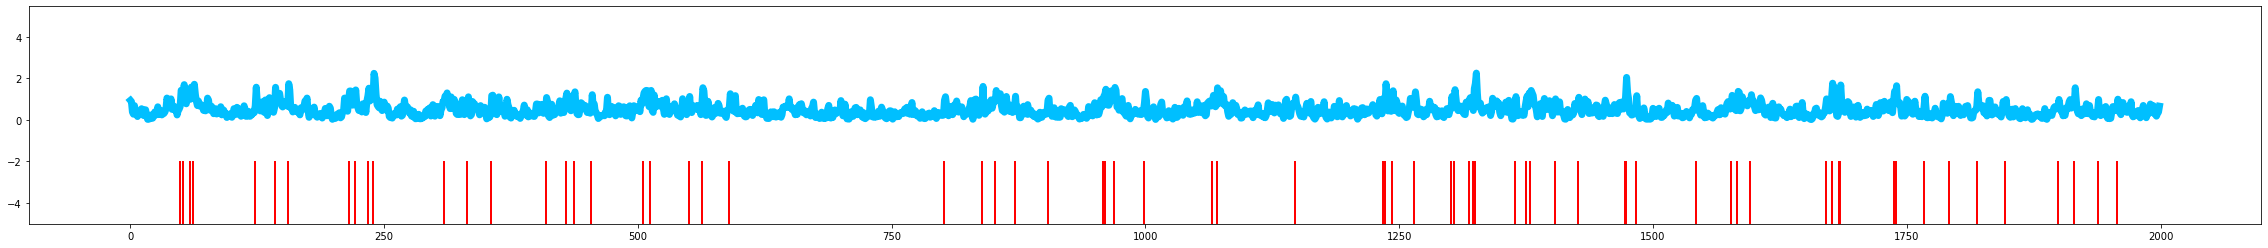

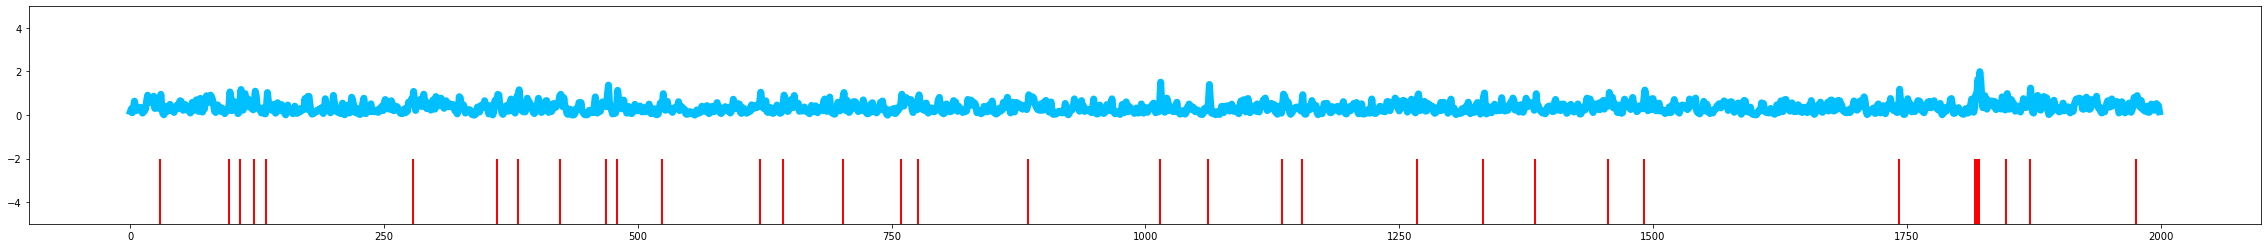

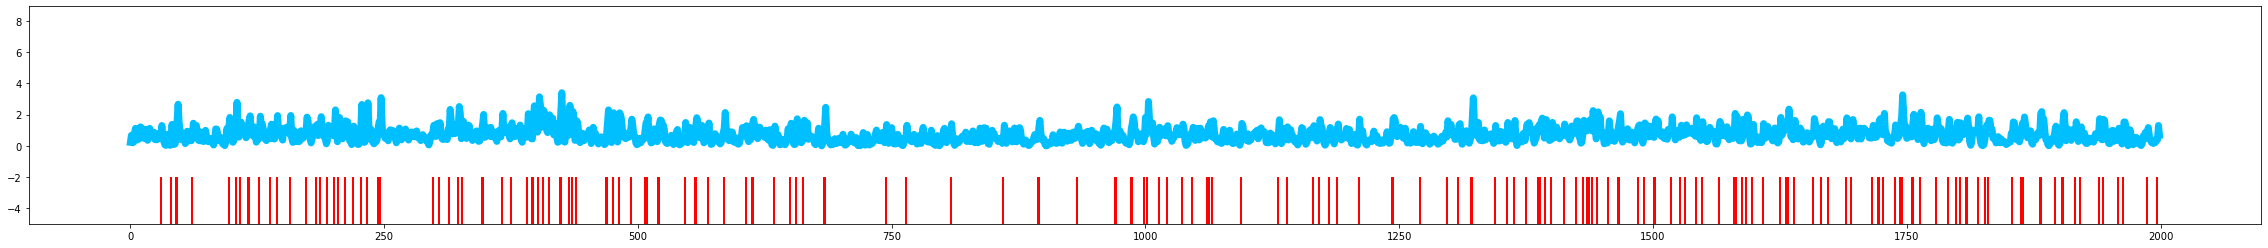

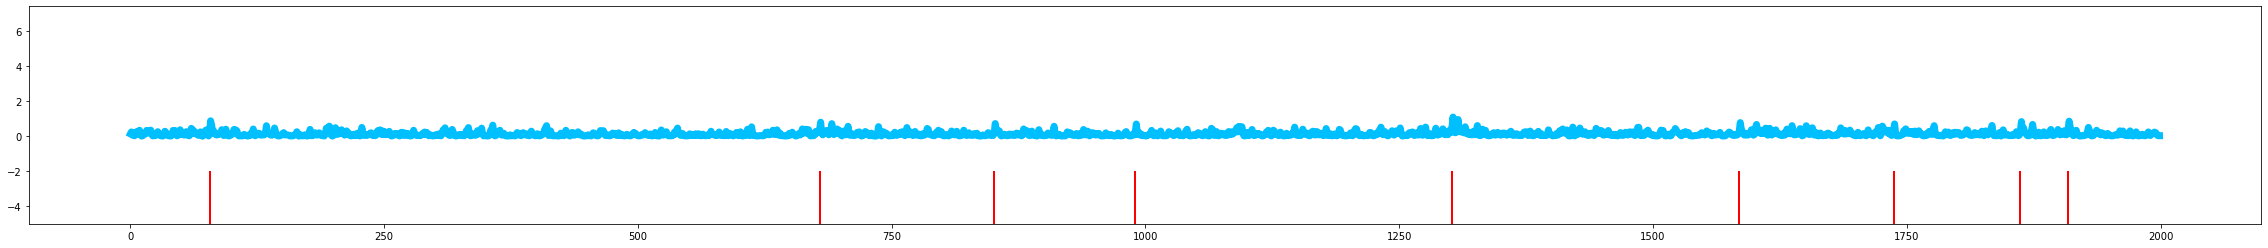

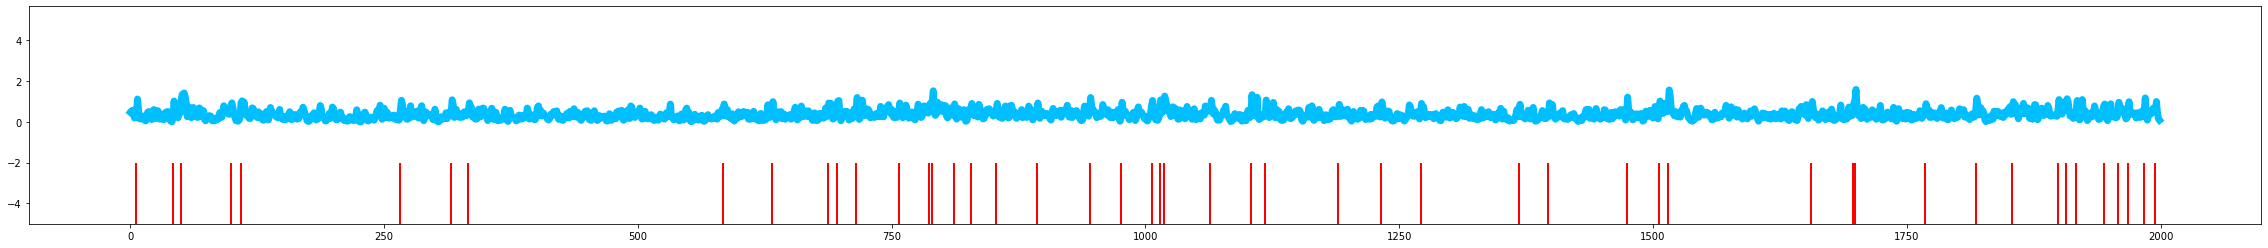

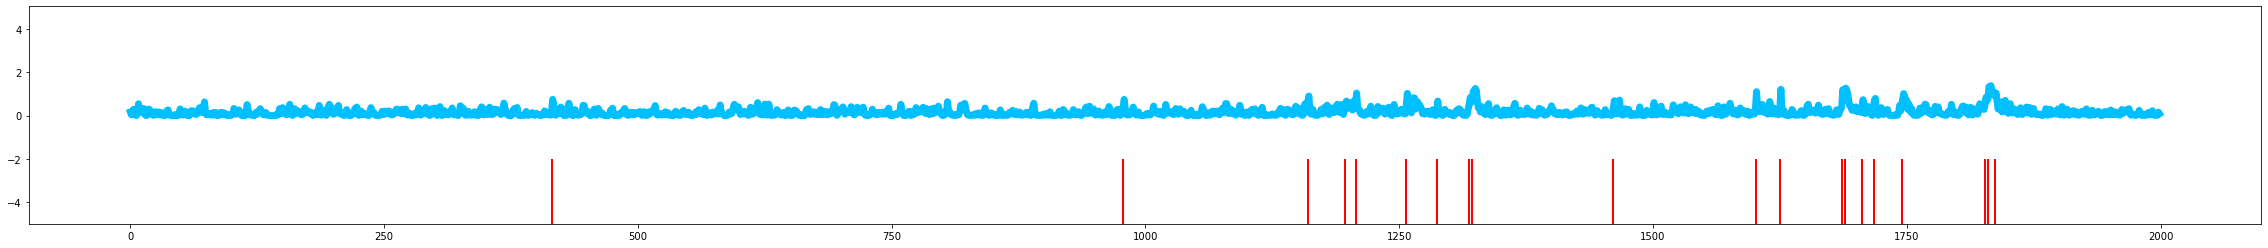

In [26]:
%autoreload

wdt = 0.57 #spiking probability = 0.59
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'see'

i = 10
name = rt_list[i][:rt_list[i].find('run')+6]
data = np.load(rt_list[i])
xfn.bcl_function_parameters(wdt, Fdata, experiment, name, data ,lamb, varB, varC, Cmean, frequency, gausfilt, mode )

In [41]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'BLNDEV-WILDTYPE/'
rt_list = adfn.return_files(Fdata, experiment, '*regtrace.npy')[:10]
rt_list

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy']

In [42]:
wdt = 0.56 #spiking probability = 0.59
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'save'

for i in range(len(rt_list)):
    name = rt_list[i][:rt_list[i].find('run')+6]
    data = np.load(rt_list[i])
    c, sks, B = xfn.bcl_function_parameters(wdt, Fdata, experiment, name, data ,lamb, varB, varC, Cmean, frequency, gausfilt, mode )
    print('Done ' + name)

Done BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01
Done BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01


In [143]:
import glob
llist = sorted(glob.glob('*PTZ05*59*bin*'))
llist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy']

In [197]:
import glob
llist = sorted(glob.glob('*PTZ05*pkg*'))
llist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_pkg.npy']

<Figure size 720x432 with 0 Axes>

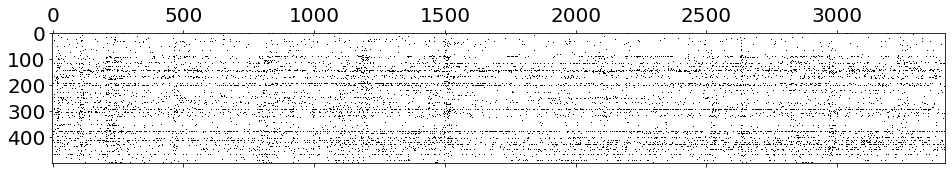

In [154]:
i=0
plt.figure(figsize=(10,6))
curr = np.load(llist[i])[2000:2500,1500:]
plot1 = plt.matshow(curr, cmap = 'Greys') 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig(Ffig + 'netmod_emp_bln.svg', transparent = True)
plt.show()



<Figure size 720x432 with 0 Axes>

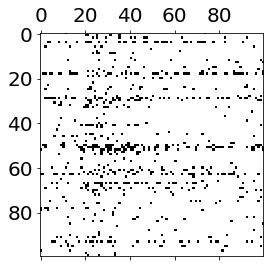

In [190]:
i=0
plt.figure(figsize=(10,6))
curr = np.load(llist[i])[2200:2300,1500:1600]
plot1 = plt.matshow(curr, cmap = 'Greys') 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig(Ffig + 'netmod_emp_bln.svg', transparent = True)
plt.show()



<Figure size 720x432 with 0 Axes>

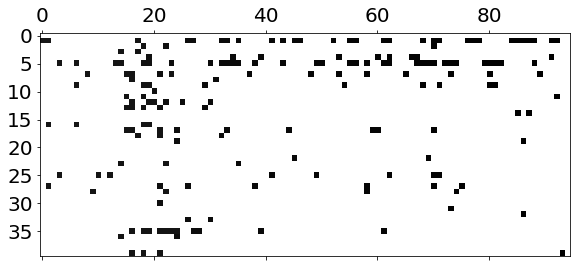

In [219]:
i=0
plt.figure(figsize=(10,6))
curr = np.load(llist[i])[2460:2500,1505:1600]
plot1 = plt.matshow(curr, cmap = 'Greys') 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig(Ffig + 'netmod_emp_bln.svg', transparent = True)
plt.show()



<Figure size 720x432 with 0 Axes>

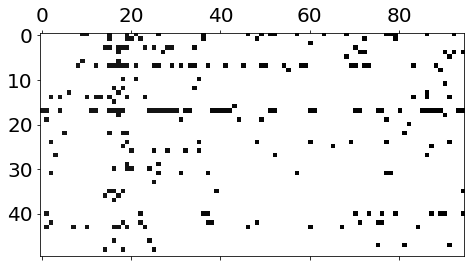

In [225]:
i=0
plt.figure(figsize=(10,6))
curr = np.load(llist[i])[2300:2350,1505:1600]
plot1 = plt.matshow(curr, cmap = 'Greys') 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig(Ffig + 'netmod_emp_bln.svg', transparent = True)
plt.show()

